### Step 1: Read and Understand the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [3]:
#To get the number of rows and columns of the dataset
bike.shape

(730, 16)

In [4]:
#5 Point summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Datatype of each column

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking missing values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the dataset

In [7]:
#Dropping outliers from the dataset, in case any.
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

bike = bike.apply(outlier_var)

In [8]:
#Renaming the columns
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,8.29,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,8.29,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.29,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.29,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,8.29,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [9]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist and Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,8.29,01-01-2018,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,8.29,02-01-2018,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.29,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.29,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,8.29,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


### Step 2: Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Features

Making a pairplot of all the numeric variables,  to visualise correlation between variables.

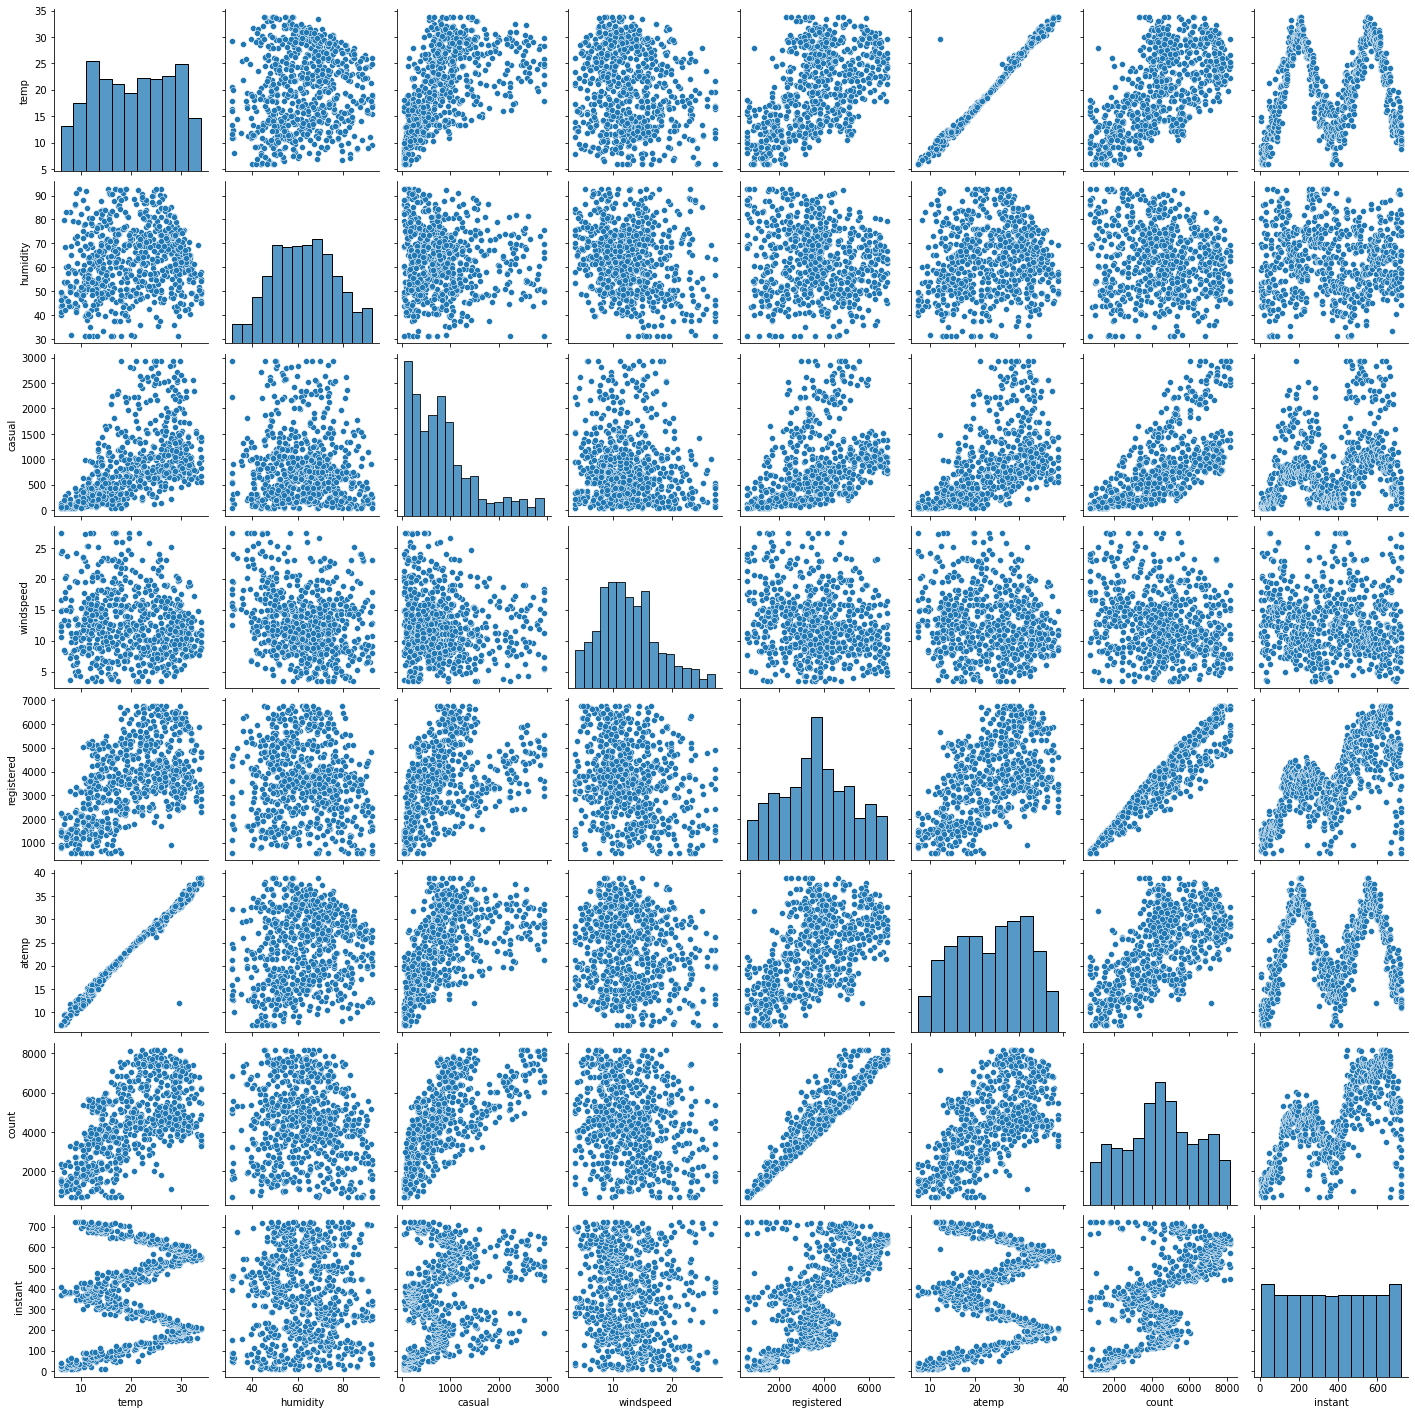

In [11]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

It can be observed that there are some independent variables positively correlated to the target variable 'count' . 



### Visualising Categorical Variables


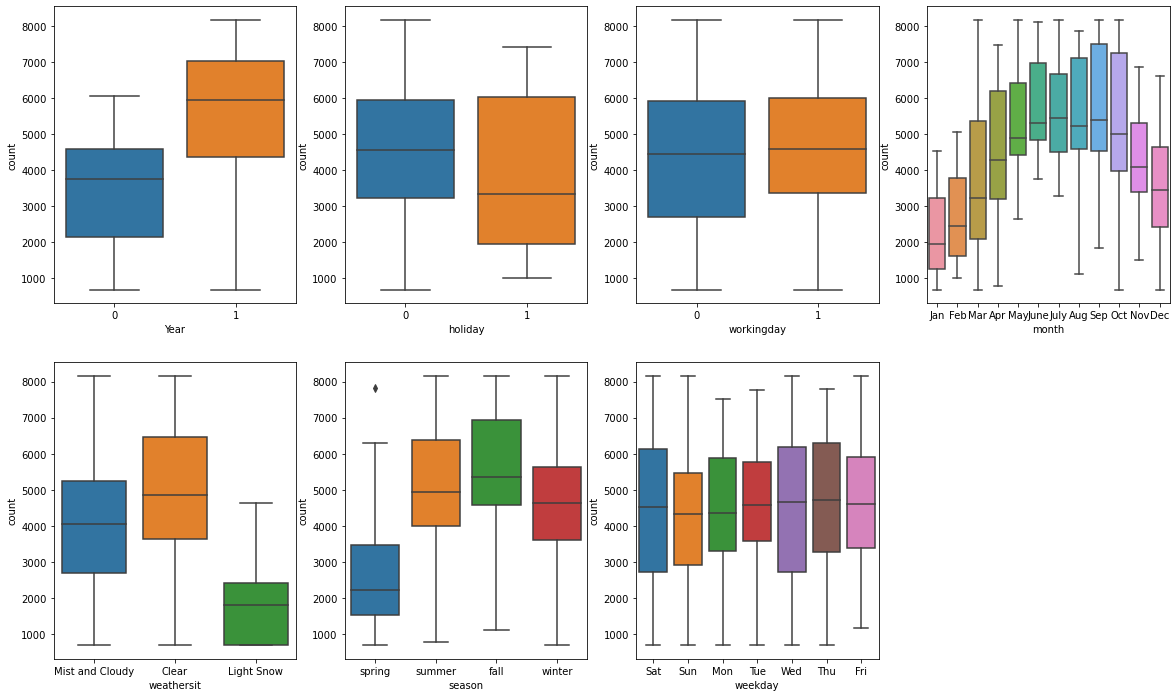

In [12]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.  
- Bike Rentals is high on Saturday,wednesday and thursday
- Bike Rentals is high in the year 2019 compared to 2018
- Bike Rentals is high during the summer and Fall season.
- Bike Rentals is high in partly cloudy weather


### Heatmap 

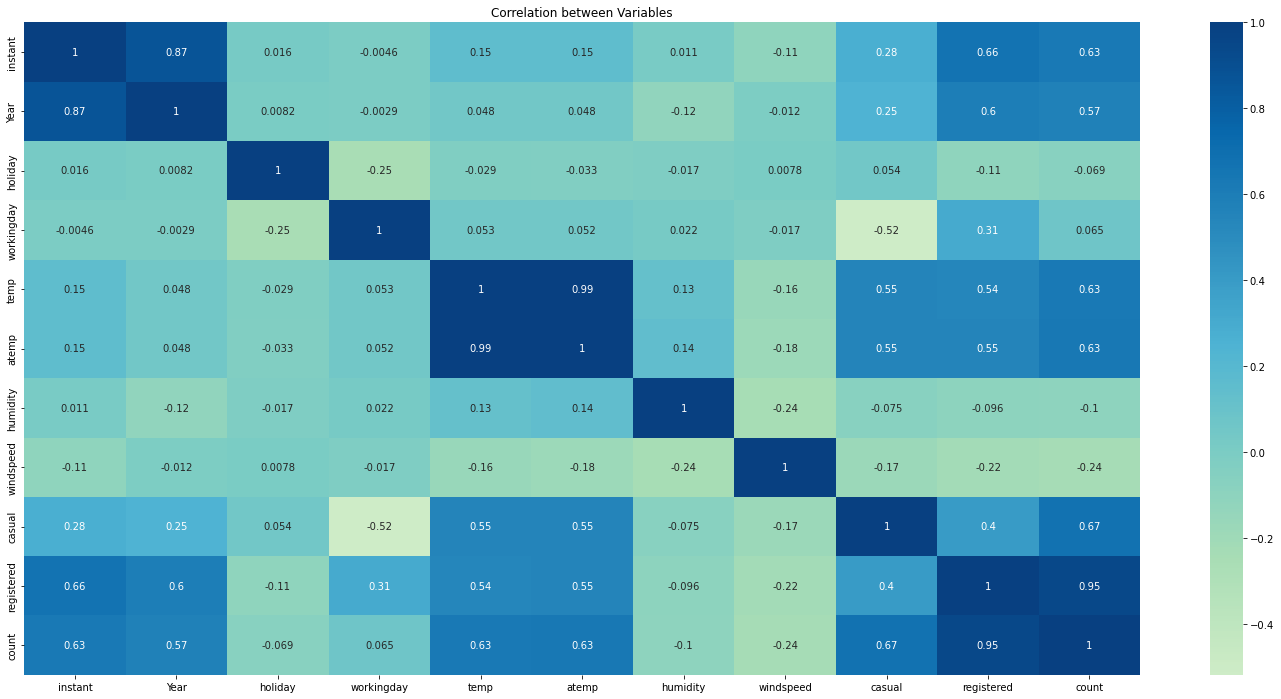

In [13]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(),cmap='GnBu',center=0,annot=True)
plt.title("Correlation between Variables")
plt.show()

It is visible from above plots,that, atemp, temp, casual,registered and instant variables are correlated to 'count' variable

Now, We can see the dataset has some variables that are not required. 
**We can drop instant, dteday** 
**casual, registered can be dropped as the 'count' variable is a sum of both, which leads wo data redundancy**

In [14]:
#drop unnecessary columns
bike =bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600.0


### Check the datatypes

In [15]:
#Datatype of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count         float64
dtype: object

### Step 3: Data Preparation

#### Create Dummy variables

In [16]:
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)


In [17]:
# Concatenating the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist and Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801.0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600.0


In [18]:
#Drop original columns since we have created the dummies for it

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist and Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,80.5833,10.749882,985.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,69.6087,16.652113,801.0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600.0


### Step 4: Splitting the Data into Training and Testing Sets

Before model building, we first need to perform the test-train split and scale the features.

In [19]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [20]:
#Number of Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

Re-scaling all the variables so that they are on the same scale for the model to be easily interpretable. 
We can use standardization(Standard scaler) or normalization(MinMax scaler).


##### Min-Max scaling

In [21]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [22]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_variables = ['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_variables] = scaler.fit_transform(bike_train[num_variables])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist and Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.834255,0.636621,0.316150,0.873193
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.394346,0.501985,0.303932,0.451756
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.161523,0.278044,0.837175,0.148054
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.339204,0.288193,0.216488,0.472360
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.280386,0.677890,0.468233,0.132936


Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors

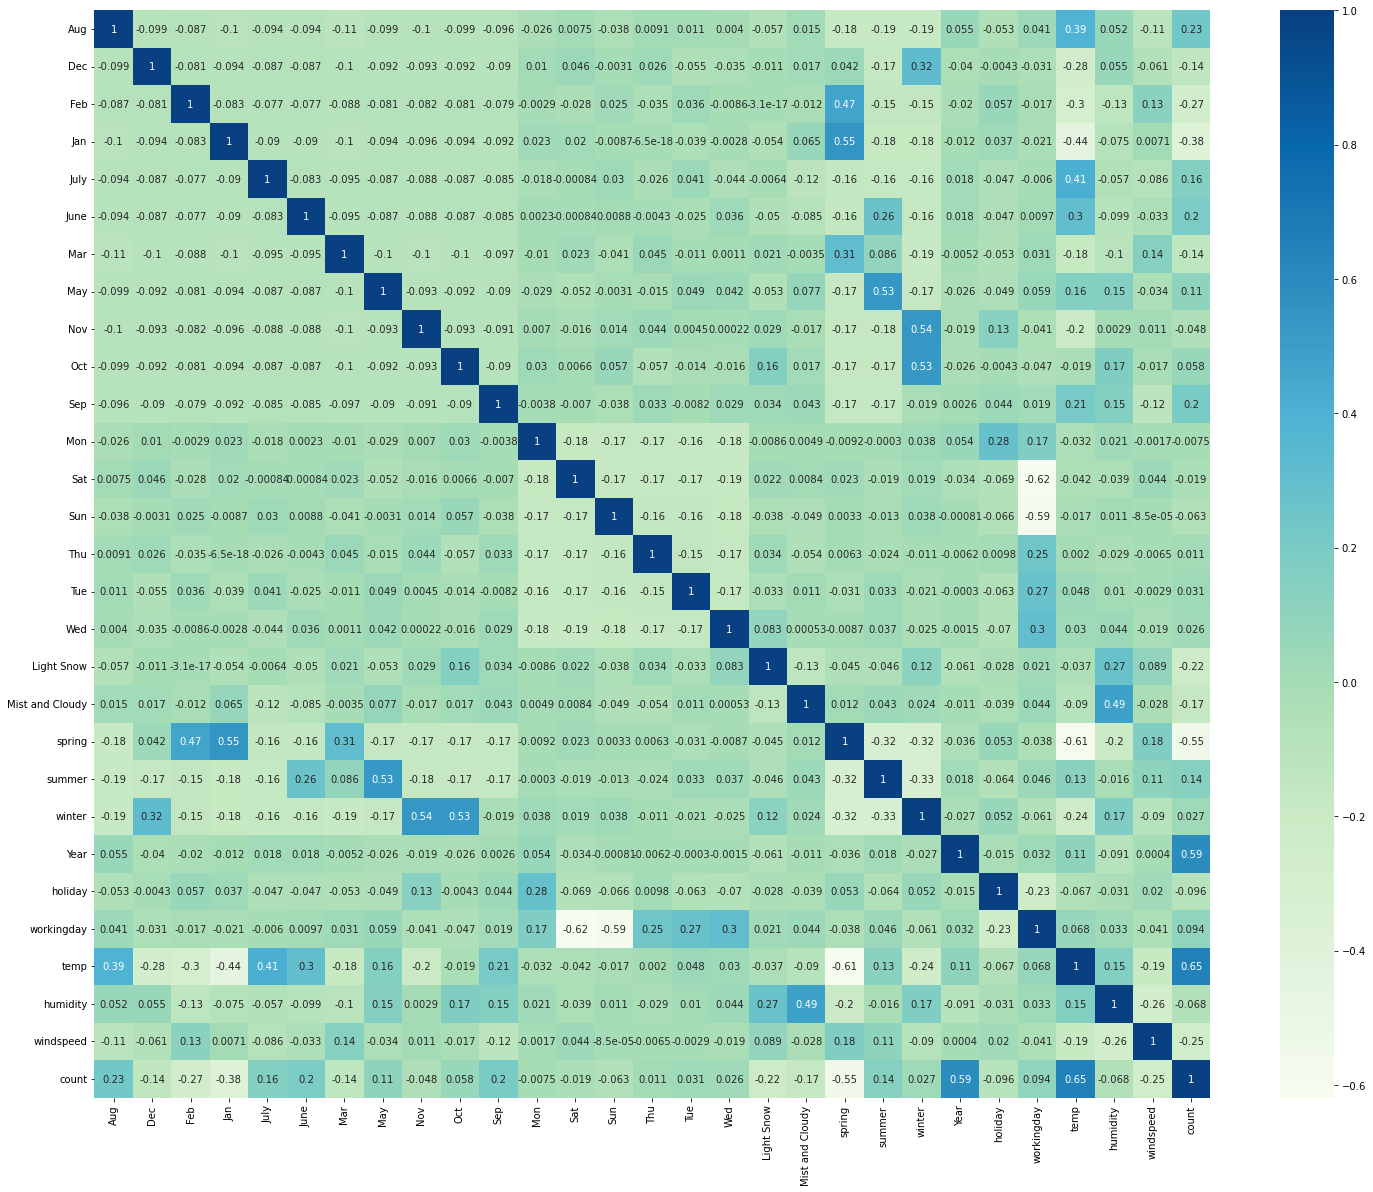

In [23]:
# Check the correlation coefficients after scaling to see which variables are highly correlated 

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='GnBu',annot = True)
plt.show()

#### Dividing into X and Y sets for the model building

In [24]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

### Step 5 : Variable Reduction

### RFE

**Recursive Feature Elimination**

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [26]:
# Running RFE with the output number of the variable equal to 15

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
27,1,True,windspeed
1,1,True,Dec
25,1,True,temp
3,1,True,Jan
4,1,True,July
23,1,True,holiday
22,1,True,Year
8,1,True,Nov
21,1,True,winter
10,1,True,Sep


In [27]:
#Features where RFE ranking is 1

final_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
final_features

array(['windspeed', 'Dec', 'temp', 'Jan', 'July', 'holiday', 'Year',
       'Nov', 'winter', 'Sep', 'spring', 'Sat', 'humidity',
       'Mist and Cloudy', 'Light Snow'], dtype=object)

### Step 6 : Model Building 

#### Building model using statsmodel, for the detailed statistics

In [28]:
# Creating X_test with RFE selected variables
X_train_rfe = X_train[final_features]


In [29]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [30]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.93e-190
Time:                        14:51:12   Log-Likelihood:                 442.04
No. Observations:                 510   AIC:                            -852.1
Df Residuals:                     494   BIC:                            -784.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3267      0.027     

#### Checking VIF

Variance Inflation Factor or VIF, tells how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
#Drop the constant term
X_train_rfe = X_train_rfe.drop(['const'], axis=1)


In [34]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,11.00
2,temp,8.88
0,windspeed,3.65
8,winter,2.83
10,spring,2.64
13,Mist and Cloudy,2.45
6,Year,2.07
7,Nov,1.82
3,Jan,1.70
1,Dec,1.52


**January has a high p-value and low VIF; can be dropped**

In [35]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)


#### Rebuilding the model without 'Jan'

In [36]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.90e-189
Time:                        14:51:12   Log-Likelihood:                 437.65
No. Observations:                 510   AIC:                            -845.3
Df Residuals:                     495   BIC:                            -781.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3087      0.026     

In [37]:
#Drop the constant term
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [38]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,10.71
2,temp,8.57
0,windspeed,3.65
7,winter,2.83
12,Mist and Cloudy,2.45
9,spring,2.13
5,Year,2.05
6,Nov,1.81
1,Dec,1.46
3,July,1.40


**'humidity' variable will be dropped due to very high  VIF**

#### Rebuilding the model without 'humidity'

In [39]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)


In [40]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          8.50e-187
Time:                        14:51:12   Log-Likelihood:                 429.32
No. Observations:                 510   AIC:                            -830.6
Df Residuals:                     496   BIC:                            -771.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2668      0.025     

In [41]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [42]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.03
0,windspeed,3.61
7,winter,2.52
5,Year,2.05
6,Nov,1.81
9,spring,1.73
11,Mist and Cloudy,1.51
1,Dec,1.43
3,July,1.37
8,Sep,1.21


**Holiday variable has a high p value and low  VIF. We can drop it**

#### Rebuliding the model without holiday

In [43]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [44]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.72e-185
Time:                        14:51:13   Log-Likelihood:                 423.43
No. Observations:                 510   AIC:                            -820.9
Df Residuals:                     497   BIC:                            -765.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2660      0.025     

In [45]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.02
0,windspeed,3.61
6,winter,2.52
4,Year,2.05
5,Nov,1.78
8,spring,1.71
10,Mist and Cloudy,1.51
1,Dec,1.43
3,July,1.36
7,Sep,1.21


**Windspeed variable has a high VIF, Lets drop it**

#### Rebuilding the model without windspeed

In [47]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [48]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          8.93e-180
Time:                        14:51:13   Log-Likelihood:                 407.09
No. Observations:                 510   AIC:                            -790.2
Df Residuals:                     498   BIC:                            -739.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2010      0.023     

In [49]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
5,winter,2.49
3,Year,2.03
4,Nov,1.76
9,Mist and Cloudy,1.49
0,Dec,1.43
2,July,1.35
7,spring,1.30
6,Sep,1.20
8,Sat,1.18


**July variables has high p value and low VIF, we will drop it**

#### Rebuilding the model without July

In [51]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [52]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          4.34e-178
Time:                        14:51:13   Log-Likelihood:                 400.28
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     499   BIC:                            -732.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.023     

In [53]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,2.46
1,temp,2.28
2,Year,2.02
3,Nov,1.76
8,Mist and Cloudy,1.48
0,Dec,1.43
6,spring,1.29
7,Sat,1.18
5,Sep,1.16
9,Light Snow,1.07


The model - lm5 will be chose, based on the following reasons-

**- The p-value for each feature is less than 0.05, which means we can reject the null hypothesis**

**-  The VIF of all features < 10, that means there is no multicollinearity,hence, the data is in good shape**

**- The R-square value is 82.6%**

**- The adjusted R-squared is 82%**

### Step 7: Residual Analysis of the train data

We would now calculate error terms and plot them.

In [55]:
X_train_lm5.head()

,const,Dec,temp,Year,Nov,winter,Sep,spring,Sat,Mist and Cloudy,Light Snow
576,1.0,0,0.834255,1,0,0,0,0,0,0,0
426,1.0,0,0.394346,1,0,0,0,1,1,1,0
728,1.0,1,0.161523,1,0,0,0,1,0,0,0
482,1.0,0,0.339204,1,0,0,0,0,1,1,0
111,1.0,0,0.280386,0,0,0,0,0,0,1,0


In [56]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [57]:
# Importing the libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

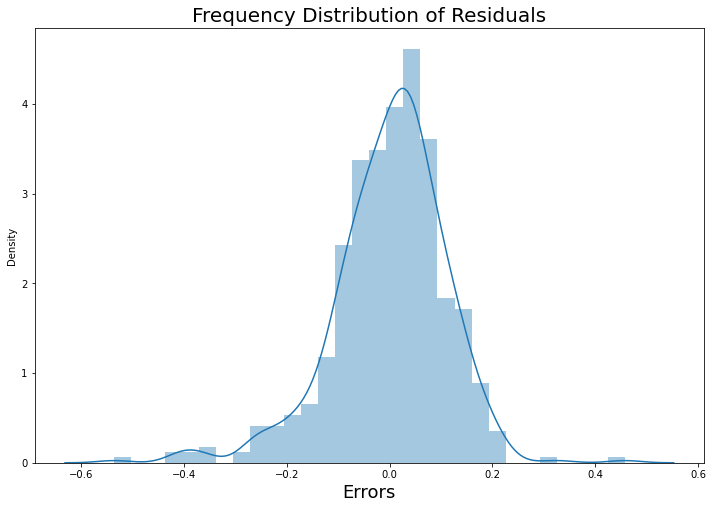

In [58]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(12,8))
sns.distplot((y_train - y_train_pred), bins = 30)
plt.title('Frequency Distribution of Residuals', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

**We can see Error terms are normally distributed**

### Step 8: Predictions

#### Applying the scaling on the test sets

In [59]:
#Create a list of numeric variables
num_variables=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_variables] = scaler.transform(bike_test[num_variables])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist and Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.853862,0.529048,0.080149,0.716258
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.935962,0.454626,0.171048,0.738735
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.476446,0.813203,0.407064,0.263514
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.912680,0.181974,0.414078,0.547282
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.836706,0.000000,0.672804,0.572434


#### Dividing into X_test and y_test


In [60]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist and Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.531743,0.498784,0.379910
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.274089,0.231110,0.207295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291720,0.327096,0.230047
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.530975,0.478983,0.362497
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.764409,0.665242,0.496660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Columns
X_train_new5.columns

Index(['Dec', 'temp', 'Year', 'Nov', 'winter', 'Sep', 'spring', 'Sat',
       'Mist and Cloudy', 'Light Snow'],
      dtype='object')

In [62]:

# Creating X_test_new by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,temp,Year,Nov,winter,Sep,spring,Sat,Mist and Cloudy,Light Snow
184,1.0,0,0.853862,0,0,0,0,0,0,1,0
535,1.0,0,0.935962,1,0,0,0,0,0,0,0
299,1.0,0,0.476446,0,0,1,0,0,0,1,0
221,1.0,0,0.912680,0,0,0,0,0,0,0,0
152,1.0,0,0.836706,0,0,0,0,0,0,0,0


In [63]:
# Making predictions
y_pred = lm5.predict(X_test_new1)


#### Find R-squared and Adjusted R-Squared for Test set

In [64]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8193995687698201

In [65]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

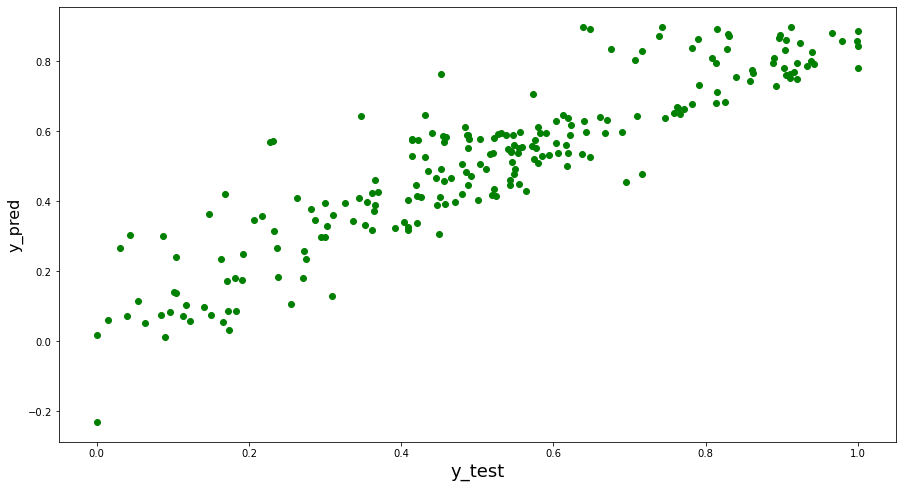

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='green')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Visualising the fit on the test set

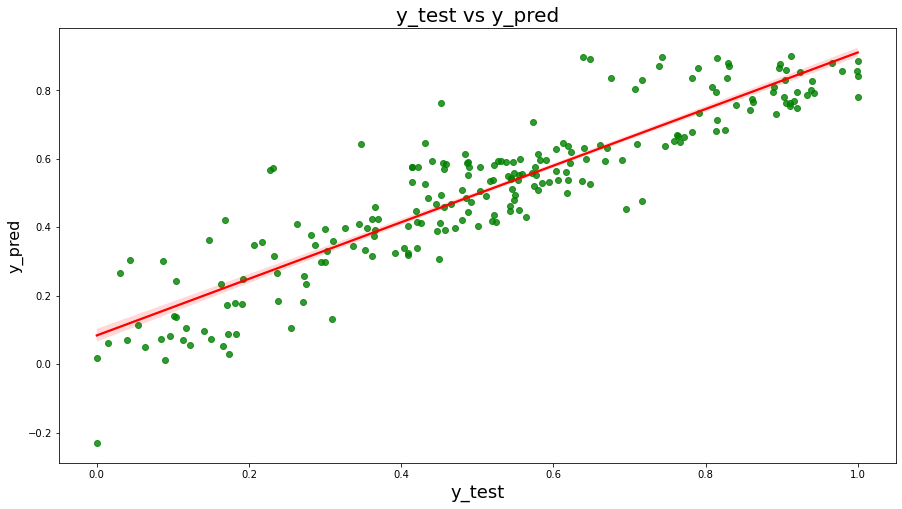

In [67]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

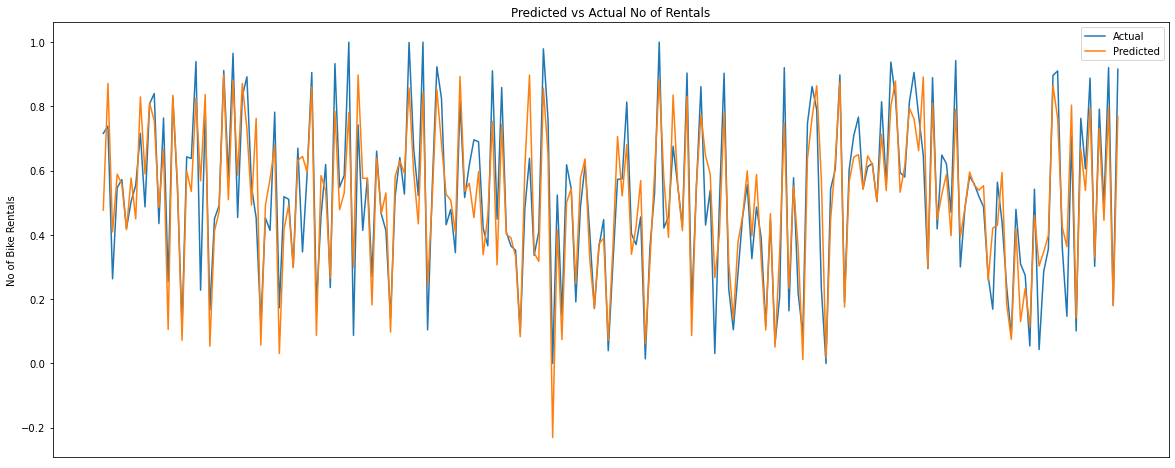

In [68]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


#### Predicted vs observed value plots shows that the model is reasonably accurate.

### Comparison between Train model and Test: 

### - Train -
      R^2 :  0.826
      Adjusted R^2 : 0.82

### - Test 
      R^2: 0.8115
      Adjusted R^2: 0.790564




### Top Features :

### The Best Fitted Line is - 

0.0650 x spring + 0.0645 x Sat + 0.0527 x summer + 0.0916 x September + 0.0970 x winter + -0.0786 x (Mist and Cloudy) + (-0.3041) x Light Snow + 0.0566 x workingday + 0.4914 x temp + 0.2334 x Year


## Conclusion:

1. Data has been treated for outliers.
2. The model has been verified for Multicollinearity using VIF.
3. The final model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)